In [15]:
#Import dependencies
import pandas as pd
import re
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from scipy import stats
from datetime import datetime

#display options
pd.set_option ('display.max_rows', None)


In [8]:
#Set path of input file
file_path = "Resources/US_Salary_Cleaned_Under1M.csv"
#Read input file into a DataFrame
salaries_df = pd.read_csv(file_path)
salaries_df.head()

,timestamp,company,title,totalyearlycompensation,yearsofexperience,yearsatcompany,basesalary,stockgrantvalue,bonus,gender,...,Highschool,Some_College,Race_Asian,Race_White,Race_Two_Or_More,Race_Black,Race_Hispanic,city,state,country
0,2017-06-07 11:33:00,Oracle,Product Manager,127000,1.5,1.5,107000,20000.0,10000.0,none,...,0,0,0,0,0,0,0,Redwood City,CA,USA
1,2017-06-10 17:11:00,eBay,Software Engineer,100000,5.0,3.0,0,0.0,0.0,none,...,0,0,0,0,0,0,0,San Francisco,CA,USA
2,2017-06-11 14:53:00,Amazon,Product Manager,310000,8.0,0.0,155000,0.0,0.0,none,...,0,0,0,0,0,0,0,Seattle,WA,USA
3,2017-06-17 00:23:00,Apple,Software Engineering Manager,372000,7.0,5.0,157000,180000.0,35000.0,none,...,0,0,0,0,0,0,0,Sunnyvale,CA,USA
4,2017-06-20 10:58:00,Microsoft,Software Engineer,157000,5.0,3.0,0,0.0,0.0,none,...,0,0,0,0,0,0,0,Mountain View,CA,USA


In [16]:
# Print out the Country value counts
company_counts = salaries_df.company.value_counts()
print(company_counts)

Amazon                                     7369
Microsoft                                  4935
Google                                     3839
Facebook                                   2364
Apple                                      1852
Oracle                                     1051
Salesforce                                  943
Intel                                       898
IBM                                         881
Cisco                                       838
Capital One                                 769
Uber                                        731
VMware                                      626
LinkedIn                                    588
Qualcomm                                    554
JPMorgan Chase                              510
Bloomberg                                   487
Intuit                                      427
PayPal                                      408
Goldman Sachs                               402
Deloitte                                

<AxesSubplot:ylabel='Density'>

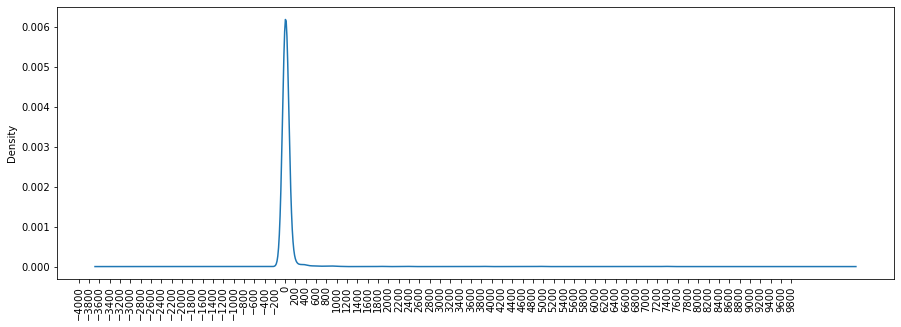

In [18]:
#Visualize the value counts with a density plot
x_ticks = np.arange(-4000,10000,200)
company_counts.plot.density(xticks=x_ticks, figsize = (15,5), rot = 90)

In [19]:
#Density seems to drop off between 100 and 200 maybe, hard to see
#But this would produce too many buckets
#So bucket all <850 as other

#Determine which values to replace
replace_companies = list(company_counts[company_counts<850].index)

#Replace in DataFrame
for company in replace_companies:
    salaries_df.company = salaries_df.company.replace(company, "Other")

#Check to make sure binning was successful
salaries_df.company.value_counts()

Other         33607
Amazon         7369
Microsoft      4935
Google         3839
Facebook       2364
Apple          1852
Oracle         1051
Salesforce      943
Intel           898
IBM             881
Name: company, dtype: int64